In [1]:
import opendatasets as od
import pandas as pd


## 1st step is to **download** the data set from kaggle

In [2]:
ds_url =  'https://www.kaggle.com/khsamaha/aviation-accident-database-synopses'
od.download_kaggle_dataset(ds_url,'.\data')

ds_filepath = '.\\data\\aviation-accident-database-synopses\\AviationData.csv'
states_filepath = '.\\data\\aviation-accident-database-synopses\\USState_Codes.csv'

aviation_ds = pd.read_csv(ds_filepath, encoding='ISO-8859-1')
states_ds = pd.read_csv(states_filepath, encoding='ISO-8859-1')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
  0%|          | 0.00/4.04M [00:00<?, ?B/s]Downloading aviation-accident-database-synopses.zip to .\data\aviation-accident-database-synopses
100%|██████████| 4.04M/4.04M [00:01<00:00, 2.18MB/s]



## 2nd step is to explore the datasets

In [3]:
aviation_ds.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'LOCATION', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [4]:
aviation_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85976 entries, 0 to 85975
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                85976 non-null  object 
 1   Investigation.Type      85963 non-null  object 
 2   Accident.Number         85976 non-null  object 
 3   Event.Date              85976 non-null  object 
 4   LOCATION                85898 non-null  object 
 5   Country                 85469 non-null  object 
 6   Latitude                31587 non-null  float64
 7   Longitude               31578 non-null  float64
 8   Airport.Code            48612 non-null  object 
 9   Airport.Name            51298 non-null  object 
 10  Injury.Severity         85842 non-null  object 
 11  Aircraft.damage         83047 non-null  object 
 12  Aircraft.Category       29226 non-null  object 
 13  Registration.Number     81756 non-null  object 
 14  Make                    85908 non-null

In [5]:
aviation_ds['Investigation.Type'].unique()

array(['Accident', 'Incident', nan], dtype=object)

In [6]:
aviation_ds['Event.Date'] = pd.to_datetime(aviation_ds['Event.Date'])

In [7]:

def get_state(text):
    return str(text)[-2:]

aviation_ds['Event.State'] = aviation_ds[aviation_ds['Country']=='United States']['LOCATION'].apply(get_state)
aviation_ds['Event.State'].unique() 

array(['WI', 'CB', 'AK', 'FL', 'WY', 'MO', 'VA', 'AZ', 'UT', 'SC', 'CA',
       'ID', 'MI', 'MA', 'LA', 'CO', 'TN', 'IA', 'WA', 'TX', 'MT', 'NC',
       'OR', 'GA', 'NV', 'AL', 'NY', 'OK', 'AR', 'NH', 'MN', 'PA', 'MS',
       'IL', 'NE', 'ME', 'SD', 'IN', 'KS', 'DE', 'NJ', 'KY', 'OH', 'ND',
       'HI', 'NM', 'MD', 'CT', 'RI', nan, 'VT', 'PR', 'O,', 'an', 'WV',
       'UN', 'GM', 'VI', 'MP', 'AO', 'PO', 'GU', 'MH', 'FN', 'DC', 'ON'],
      dtype=object)

In [8]:
aviation_ds['Country'].describe()

count             85469
unique              185
top       United States
freq              80132
Name: Country, dtype: object

In [9]:
aviation_ds['Injury.Severity'].unique()

array(['Fatal', 'Minor', 'Non-Fatal', 'Siruose', nan, 'Unavailable',
       'Incident', 'Fatal(1)', 'Fatal(2)', 'Fatal(8)', 'Fatal(5)',
       'Fatal(3)', 'Fatal(4)', 'Fatal(9)', 'Fatal(176)', 'Fatal(7)',
       'Fatal(29)', 'Fatal(6)', 'Fatal(10)', 'Fatal(11)', 'Fatal(14)',
       'Fatal(41)', 'Fatal(157)', 'Fatal(188)', 'Fatal(112)', 'Fatal(71)',
       'Fatal(12)', 'Fatal(39)', 'Fatal(16)', 'Fatal(66)', 'Fatal(62)',
       'Fatal(23)', 'Fatal(224)', 'Fatal(150)', 'Fatal(43)', 'Fatal(162)',
       'Fatal(58)', 'Fatal(295)', 'Fatal(239)', 'Fatal(33)', 'Fatal(50)',
       'Fatal(21)', 'Fatal(19)', 'Fatal(153)', 'Fatal(127)', 'Fatal(28)',
       'Fatal(77)', 'Fatal(42)', 'Fatal(158)', 'Fatal(103)', 'Fatal(89)',
       'Fatal(90)', 'Fatal(152)', 'Fatal(228)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(24)', 'Fatal(88)', 'Fatal(65)', 'Fatal(154)', 'Fatal(30)',
       'Fatal(20)', 'Fatal(40)', 'Fatal(57)', 'Fatal(199)', 'Fatal(114)',
       'Fatal(102)', 'Fatal(96)', 'Fatal(49)', 'Fatal(124)'

In [10]:
aviation_ds['Model'].unique()

array(['Vtwin', '206', 'M-6-235', ..., '23-250', '305 (L-19)',
       'WCS-222 (BELL 47G)'], dtype=object)

**Some plots**

In [48]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (28, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [49]:
aviation_ds['Weather.Condition'].unique()

array(['VMC', nan, 'IMC', 'Unk', 'UNK'], dtype=object)

In [50]:
aviation_ds.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'LOCATION', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Event.State'],
      dtype='object')

<AxesSubplot:xlabel='Country', ylabel='Total.Fatal.Injuries'>

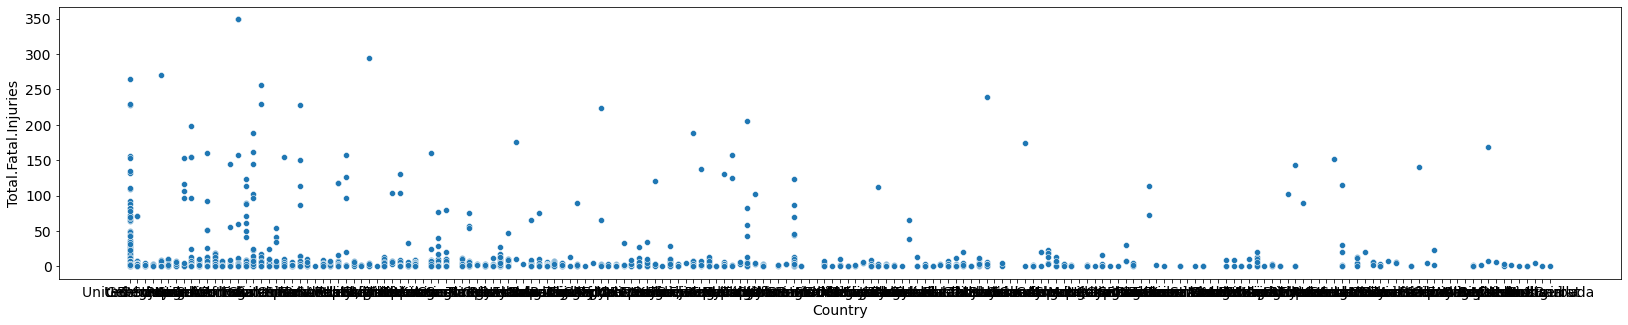

In [53]:
sns.scatterplot(x='Air.carrier',y ='Total.Fatal.Injuries', data=aviation_ds)